#Heart Disease Project

In [42]:
import pandas as pd
import numpy as np

In [2]:
heart_data=[line.rstrip() for line in open ('hungarian.data')]

In [4]:
df1=pd.read_csv('hungarian.data', sep=' ',
                names=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num'] ) 
   

Data Dictionary

age: age in years
sex: sex (1 = male; 0 = female)
        
cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
10 trestbps: resting blood pressure (in mm Hg on admission to the 
        hospital)
        
12 chol: serum cholestoral in mg/dl
16 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
                
19 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
                
32 thalach: maximum heart rate achieved

38 exang: exercise induced angina (1 = yes; 0 = no)

40 oldpeak = ST depression induced by exercise relative to rest

41 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
                 
 
 44 ca: number of major vessels (0-3) colored by flourosopy
 

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


 58 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
                           

In [5]:
df1.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
227,53.0,1.0,3.0,120.0,195.0,0.0,0.0,140.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
156,38.0,1.0,4.0,110.0,-9.0,0.0,0.0,150.0,1.0,1.0,2.0,-9.0,-9.0,2.0
196,62.0,0.0,1.0,160.0,193.0,0.0,0.0,116.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
29,51.0,1.0,2.0,125.0,188.0,0.0,0.0,145.0,0.0,0.0,-9.0,-9.0,-9.0,0.0
163,49.0,0.0,2.0,110.0,-9.0,0.0,0.0,160.0,0.0,0.0,-9.0,-9.0,-9.0,0.0


In [6]:
df1.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num         float64
dtype: object

# b) Compute the mean, median, min, max, and standard deviation for each of the quantitative variables.


In [7]:
df1.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.00000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,47.826531,0.724490,2.982993,132.102041,230.520408,-0.176871,0.187075,138.62585,0.272109,0.586054,-5.146259,-8.846939,-7.605442,0.792517
std,7.811812,0.447533,0.965117,19.437564,95.414336,1.499491,0.707616,25.08408,0.711273,0.908648,5.221611,1.382623,4.333468,1.237006
min,28.000000,0.000000,1.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.00000,-9.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,198.000000,0.000000,0.000000,122.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,237.000000,0.000000,0.000000,140.00000,0.000000,0.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.00000,1.000000,1.000000,2.000000,-9.000000,-9.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.00000,1.000000,5.000000,3.000000,9.000000,7.000000,4.000000


In [61]:
df1.skew()

age         -0.284261
sex         -1.010104
cp          -0.218171
trestbps    -0.704533
chol        -0.472436
fbs         -5.565726
restecg     -6.917581
thalach     -0.719031
exang       -7.323916
oldpeak      1.548824
slope        0.619432
ca          10.089960
thal         2.832801
num          1.359214
dtype: float64

In [8]:
#Compute mean, standard deviation, min, max, median, lenght, and missing values of CRIM

print ('Alternatively, age statistics can be printed using the code above:')
print ('======================================================')
print('Mean : ', df1.age.mean())
print('Std. dev.: ', df1.age.std())
print('Min : ', df1.age.min())
print('Max : ', df1.age.max())
print('Median : ', df1.age.median())
print('Length : ', len(df1.age))
print('Number of missing values: ', df1.age.isnull().sum())
print ('======================================================')
print ('\n')


Alternatively, age statistics can be printed using the code above:
Mean :  47.826530612244895
Std. dev.:  7.811812413149751
Min :  28.0
Max :  66.0
Median :  49.0
Length :  295
Number of missing values:  1




# c) Plot a histogram for each of the quantitative variables

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

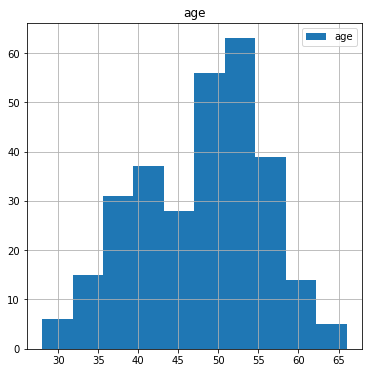

In [9]:
df1.hist(column='age', by=None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=(6,6), layout=None, bins=10, backend=None, legend=True)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'num'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

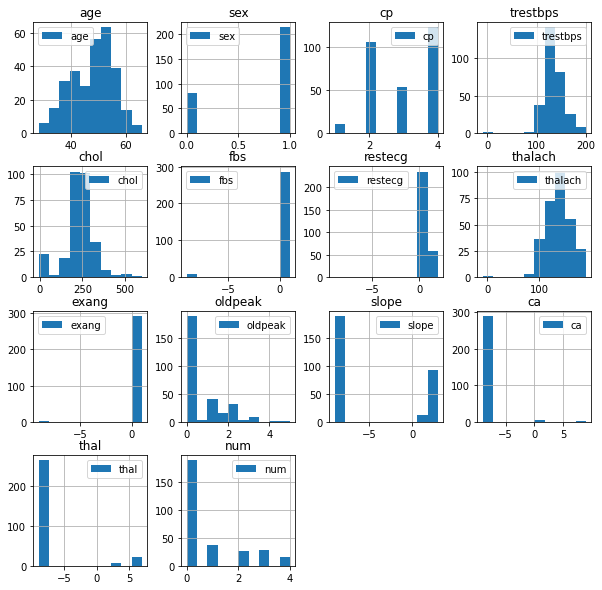

In [75]:
df1.hist(column=None, by= None, grid=True, xlabelsize=None, xrot=None, ylabelsize=None, yrot=None, ax=None, sharex=False, sharey=False, figsize=(10,10), layout=None, bins=10, backend=None, legend=True)

# d) side-by-side boxplot comparing any two variables.

<AxesSubplot:>

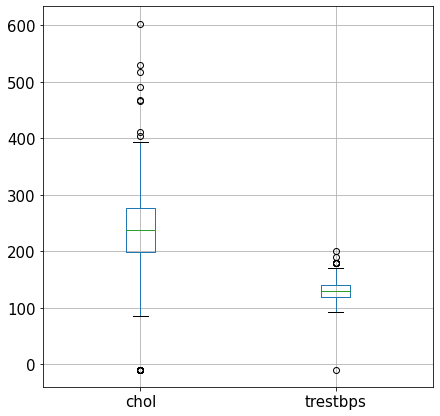

In [67]:
df1.boxplot(column=['chol','trestbps'], by=None, ax=None, fontsize=15, rot=0, grid=True, figsize=(7,7), layout=None, return_type=None, backend=None)

<AxesSubplot:>

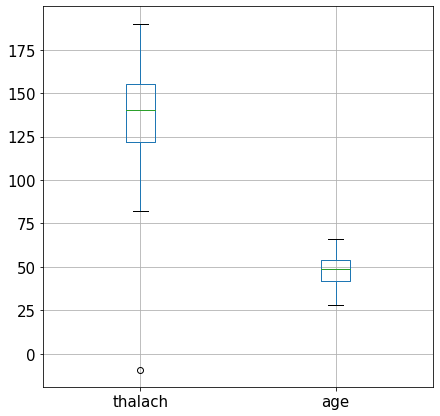

In [69]:
df1.boxplot(column=['thalach','age'], by=None, ax=None, fontsize=15, rot=0, grid=True, figsize=(7,7), layout=None, return_type=None, backend=None)

# e) Correlation table for a few of the quantitative variables

In [70]:
corr=df1.corr().round(4)

In [72]:
corr.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.0000,0.0136,0.1458,0.2214,0.0438,0.0452,-0.0071,-0.4318,0.1535,0.1777,0.2320,0.0366,0.0076,0.2099
sex,0.0136,1.0000,0.2499,0.1206,0.0325,0.0899,-0.0953,-0.0718,0.1720,0.1189,0.0470,-0.0309,0.0140,0.2231
cp,0.1458,0.2499,1.0000,0.1027,0.1167,0.0026,0.0796,-0.3266,0.3647,0.3531,0.3754,0.0710,0.0759,0.4287
trestbps,0.2214,0.1206,0.1027,1.0000,0.0172,0.0621,-0.0374,-0.0109,0.4492,0.1478,0.1320,0.0566,-0.0284,0.2124
chol,0.0438,0.0325,0.1167,0.0172,1.0000,-0.1108,0.0315,-0.0916,0.0745,0.1338,0.1652,-0.0730,0.0670,0.2210


<AxesSubplot:>

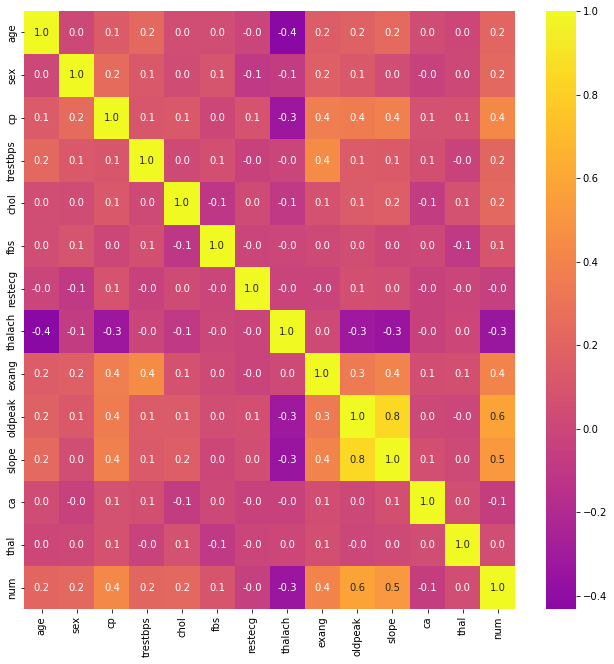

In [77]:
# Using seaborn
# Simple heatmap of correlations (without values)
import matplotlib.pylab as plt
import seaborn as sns

# Include information about values (example demonstrates how to control the sizeof the plot)
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="plasma", center=0, ax=ax)

# f) Principal Component Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
type(df1)

pandas.core.frame.DataFrame

In [16]:
df1.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [17]:
pip install -U scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.preprocessing import StandardScaler


In [25]:
scaler= StandardScaler()

In [26]:
scaler.fit(df1)

StandardScaler()

In [33]:
scaled_data=scaler.transform(df1)

In [34]:
scaled_data

array([[-1.00359234,  0.61666984, -1.02025916, ..., -0.11089228,
        -0.32235972, -0.64176614],
       [ 0.15047343, -1.62161328,  0.01765154, ..., -0.11089228,
        -0.32235972,  0.16801603],
       [-1.38828093,  0.61666984, -1.02025916, ..., -0.11089228,
        -0.32235972, -0.64176614],
       ...,
       [ 0.0222439 ,  0.61666984,  0.01765154, ..., -0.11089228,
         3.14497288, -0.64176614],
       [-0.10598563, -1.62161328, -1.02025916, ..., -0.11089228,
        -0.32235972, -0.64176614],
       [ 0.66339155,  0.61666984,  1.05556224, ..., -0.11089228,
        -0.32235972, -0.64176614]])

In [31]:
df1 = df1.dropna()

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [35]:
pca.fit(scaled_data)

PCA(n_components=2)

In [36]:
x_pca=pca.transform(scaled_data)

In [38]:
scaled_data.shape

(294, 14)

In [46]:
x_pca.shape

(294, 2)

Text(0, 0.5, 'Second PCA')

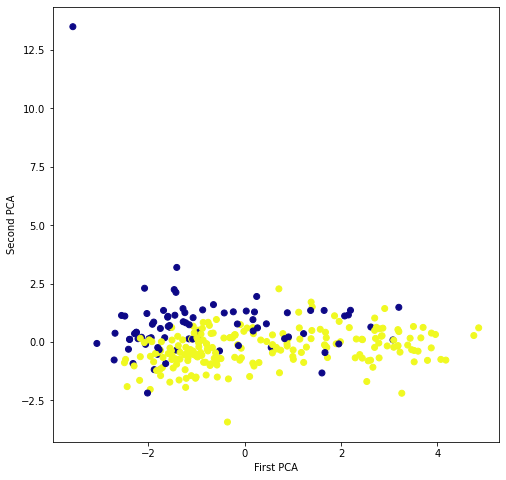

In [56]:
plt.figure(figsize=(8,8))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df1['sex'],cmap='plasma')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')